In [2]:
import os
import pandas as pd
import pm4py

Data Loading:

In [4]:
file_dir = '../data/'
file_name = 'Hospital_Billing_Eventlog.xes'
download_url = 'https://data.4tu.nl/file/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/28b83e72-375e-4da4-8459-a8506e898edf'
# Check if file exists and download it if not

# Check if directory exists
if not os.path.exists(file_dir):
    os.system("mkdir " + file_dir)
if not os.path.exists(file_dir + file_name):
    print('Downloading file...')
    os.system(f'wget -O {file_dir + file_name + ".gz"} {download_url}')
    os.system(f'gzip -d {file_dir + file_name + ".gz"}')


In [3]:
data = pm4py.read_xes(file_dir + file_name)
data = pm4py.format_dataframe(data)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:33<00:00, 2994.51it/s]


In [4]:
# Get overview over data
data

isCancelled diagnosis            time:timestamp caseType speciality  \
0            False         A 2012-12-16 19:33:10+00:00        A          A   
1              NaN       NaN 2013-12-15 19:00:37+00:00      NaN        NaN   
2              NaN       NaN 2013-12-16 03:53:38+00:00      NaN        NaN   
3              NaN       NaN 2013-12-17 12:56:29+00:00      NaN        NaN   
4              NaN       NaN 2013-12-19 03:44:31+00:00      NaN        NaN   
...            ...       ...                       ...      ...        ...   
451354       False        UE 2015-06-27 02:01:17+00:00        A          H   
451355         NaN       NaN 2015-07-06 23:57:45+00:00      NaN        NaN   
451356         NaN       NaN 2015-07-15 05:39:38+00:00      NaN        NaN   
451357         NaN       NaN 2015-07-15 06:33:01+00:00      NaN        NaN   
451358         NaN       NaN 2015-07-20 22:34:51+00:00      NaN        NaN   

       org:resource concept:name blocked isClosed flagD  ... closeCode actRed  \
0              ResA          NEW   False     True  True  ...       NaN    NaN   
1               NaN          FIN     NaN      NaN   NaN  ...         A    NaN   
2               NaN      RELEASE     NaN      NaN   NaN  ...       NaN    NaN   
3               NaN      CODE OK     NaN      NaN   NaN  ...       NaN  False   
4              ResB       BILLED     NaN      NaN   NaN  ...       NaN    NaN   
...             ...          ...     ...      ...   ...  ...       ...    ...   
451354         ResA          NEW   False     True  True  ...       NaN    NaN   
451355          NaN          FIN     NaN      NaN   NaN  ...         A    NaN   
451356          NaN      RELEASE     NaN      NaN   NaN  ...       NaN    NaN   
451357          NaN      CODE OK     NaN      NaN   NaN  ...       NaN  False   
451358         ResB       BILLED     NaN      NaN   NaN  ...       NaN    NaN   

       actOrange  flagC msgCount version msgType msgCode @@index  @@case_index  
0            NaN    NaN      NaN     NaN     NaN     NaN       0             0  
1            NaN    NaN      NaN     NaN     NaN     NaN       1             0  
2            NaN    NaN      NaN     NaN     NaN     NaN       2             0  
3          False  False      0.0       A     NaN     NaN       3             0  
4            NaN    NaN      NaN     NaN     NaN     NaN       4             0  
...          ...    ...      ...     ...     ...     ...     ...           ...  
451354       NaN    NaN      NaN     NaN     NaN     NaN  451354         99999  
451355       NaN    NaN      NaN     NaN     NaN     NaN  451355         99999  
451356       NaN    NaN      NaN     NaN     NaN     NaN  451356         99999  
451357     False  False      0.0       E     NaN     NaN  451357         99999  
451358       NaN    NaN      NaN     NaN     NaN     NaN  451358         99999  

[451359 rows x 25 columns]

Preprocessing:

In [5]:
# print columns
data = data[['@@case_index', 'diagnosis', 'concept:name', 'isCancelled', 'isClosed']]
data

@@case_index diagnosis concept:name isCancelled isClosed
0                  0         A          NEW       False     True
1                  0       NaN          FIN         NaN      NaN
2                  0       NaN      RELEASE         NaN      NaN
3                  0       NaN      CODE OK         NaN      NaN
4                  0       NaN       BILLED         NaN      NaN
...              ...       ...          ...         ...      ...
451354         99999        UE          NEW       False     True
451355         99999       NaN          FIN         NaN      NaN
451356         99999       NaN      RELEASE         NaN      NaN
451357         99999       NaN      CODE OK         NaN      NaN
451358         99999       NaN       BILLED         NaN      NaN

[451359 rows x 5 columns]

In [6]:
# Save as new, smaller csv
data.to_csv('../data/preprocessed_data.csv', sep=';', index=False)

Feature Extraction:

In [3]:
# Overview over unique values for each column
data = pd.read_csv('../data/preprocessed_data.csv', sep=';')
print("Unique value oveview:\n")
print("======================")
print(data.nunique())
print("======================")
unique_states = data["concept:name"].unique()

Unique value oveview:

@@case_index    100000
diagnosis         1191
concept:name        18
isCancelled          2
isClosed             2
dtype: int64


In [6]:
# Get traces
traces = data.groupby('@@case_index')['concept:name'].apply(tuple).reset_index().rename(columns={"concept:name": "Traces"})

In [7]:
traces

@@case_index                                             Traces
0                 0               (NEW, FIN, RELEASE, CODE OK, BILLED)
1                 1  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...
2                 2                                             (NEW,)
3                 3  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...
4                 4  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...
...             ...                                                ...
99995         99995  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...
99996         99996                                      (NEW, DELETE)
99997         99997                        (NEW, CHANGE DIAGN, DELETE)
99998         99998                                             (NEW,)
99999         99999               (NEW, FIN, RELEASE, CODE OK, BILLED)

[100000 rows x 2 columns]

In [9]:
# Get the value counts for each unique trace
trace_counts = traces['Traces'].value_counts()

# Convert to dictionary
trace_counts_dict = trace_counts.to_dict()

In [10]:
trace_counts_dict

{('NEW', 'CHANGE DIAGN', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 33672,
 ('NEW',): 22373,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED'): 20901,
 ('NEW', 'DELETE'): 4813,
 ('NEW', 'FIN'): 3508,
 ('NEW',
  'CHANGE DIAGN',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 2121,
 ('NEW', 'CHANGE DIAGN', 'DELETE'): 1555,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'BILLED'): 977,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 869,
 ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED', 'CODE OK'): 512,
 ('NEW', 'FIN', 'RELEASE', 'CODE NOK', 'EMPTY'): 400,
 ('NEW', 'FIN', 'RELEASE', 'BILLED'): 359,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT',
  'BILLED'): 314,
 ('NEW',
  'FIN',
  'RELEASE',
  'CODE OK',
  'REOPEN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED'): 273,
 ('NEW',
  'CHANGE DIAGN',
  'FIN',
  'RELEASE',
  'CODE OK',
  'BILLED',
  'STORNO',
  'REJECT


### Counter Vectorizer 
1. Getting Unique pages and trace_count_dict as dataframe
2. Converting Traces to Strings 
3. Creating CounterVectorizer 
4. Using Vectorizer with traces to create dataframe



In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


df = pd.DataFrame(list(trace_counts_dict.items()), columns=['Traces', 'Count'])
traces = [' '.join(trace) for trace in trace_counts_dict.keys()]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(traces) 
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


### Clustering Algorithm K-Means:
1. Clustering of Traces based on vectorized Dataframe with K-Means

In [12]:
from sklearn.cluster import KMeans
num_clusters = 15


kmeans = KMeans(n_clusters=num_clusters, random_state=12345, n_init=20)
kmeans.fit(df_vectorized)


df['Cluster'] = kmeans.labels_
df_sorted = df.sort_values(by='Cluster')

df_sorted.to_csv('../data/clustered_traces_countvectorized_kmeans.csv', index=False)

cluster_sizes = df_sorted['Cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} Traces")

Cluster 0: 18 Traces
Cluster 1: 2 Traces
Cluster 2: 20 Traces
Cluster 3: 180 Traces
Cluster 4: 4 Traces
Cluster 5: 103 Traces
Cluster 6: 96 Traces
Cluster 7: 1 Traces
Cluster 8: 99 Traces
Cluster 9: 10 Traces
Cluster 10: 104 Traces
Cluster 11: 1 Traces
Cluster 12: 259 Traces
Cluster 13: 28 Traces
Cluster 14: 97 Traces


### Evaluation:
Silhouette Coefficient: distance between the clusters 


In [13]:
from sklearn.metrics import silhouette_score,silhouette_samples

silhouette_avg = silhouette_score(df_vectorized, kmeans.labels_)
print(f"Silhouette Coefficient AVG: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(df_vectorized, kmeans.labels_)
for i in range(num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    print(f"Silhouette Coefficient for cluster {i}: {np.mean(ith_cluster_silhouette_values)}")

Silhouette Coefficient AVG: 0.19957268764200708
Silhouette Coefficient for cluster 0: 0.43306933591228236
Silhouette Coefficient for cluster 1: 0.43360033132880627
Silhouette Coefficient for cluster 2: 0.12761463129602627
Silhouette Coefficient for cluster 3: 0.18953479010008914
Silhouette Coefficient for cluster 4: 0.6869910907018282
Silhouette Coefficient for cluster 5: 0.19600038599448416
Silhouette Coefficient for cluster 6: 0.18274290815212882
Silhouette Coefficient for cluster 7: 0.0
Silhouette Coefficient for cluster 8: 0.1685731505305405
Silhouette Coefficient for cluster 9: 0.5490984637280621
Silhouette Coefficient for cluster 10: 0.19414856359527538
Silhouette Coefficient for cluster 11: 0.0
Silhouette Coefficient for cluster 12: 0.18499089728702506
Silhouette Coefficient for cluster 13: 0.2883556156708552
Silhouette Coefficient for cluster 14: 0.2040740528292394


### Visualization:

- Using TSNE to visualize results

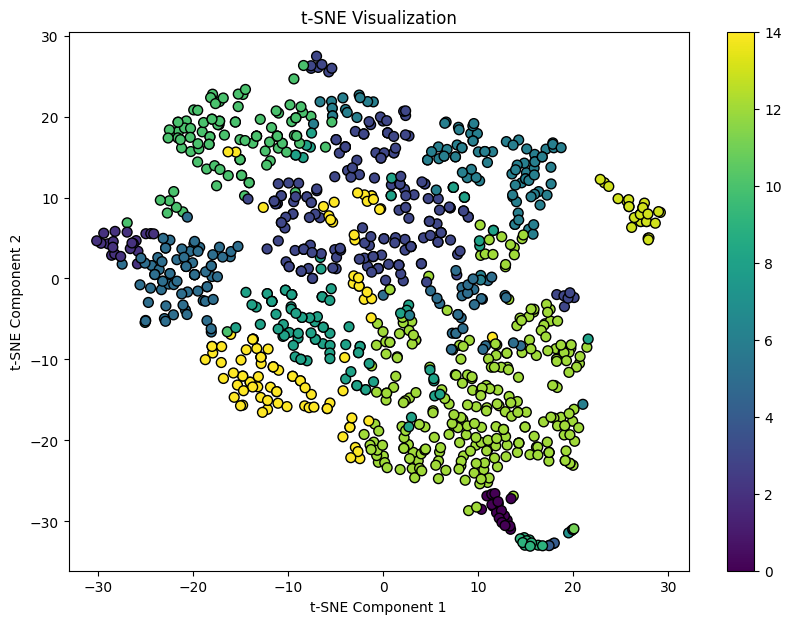

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, perplexity=50, max_iter=1000)
tsne_result = tsne.fit_transform(df_vectorized)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


### Postprocessing: Petri-Net for every Cluster 

clid 0 group                                                  Traces  Count  Cluster
787                                (NEW, NEW, NEW, FIN)      1        0
621   (NEW, NEW, NEW, NEW, FIN, RELEASE, CODE NOK, R...      1        0
637              (NEW, NEW, NEW, NEW, NEW, NEW, DELETE)      1        0
917                           (NEW, NEW, NEW, NEW, FIN)      1        0
543                           (NEW, NEW, NEW, NEW, NEW)      1        0
141                        (NEW, NEW, NEW, NEW, DELETE)      6        0
648       (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW)      1        0
514                      (NEW, NEW, NEW, NEW, NEW, NEW)      1        0
447   (NEW, NEW, NEW, NEW, FIN, RELEASE, CODE OK, BI...      1        0
209                                (NEW, NEW, NEW, NEW)      3        0
280                   (NEW, NEW, NEW, NEW, FIN, DELETE)      2        0
230                   (NEW, NEW, NEW, NEW, NEW, DELETE)      3        0
810         (NEW, NEW, NEW, NEW, NEW, NEW, NEW, DEL

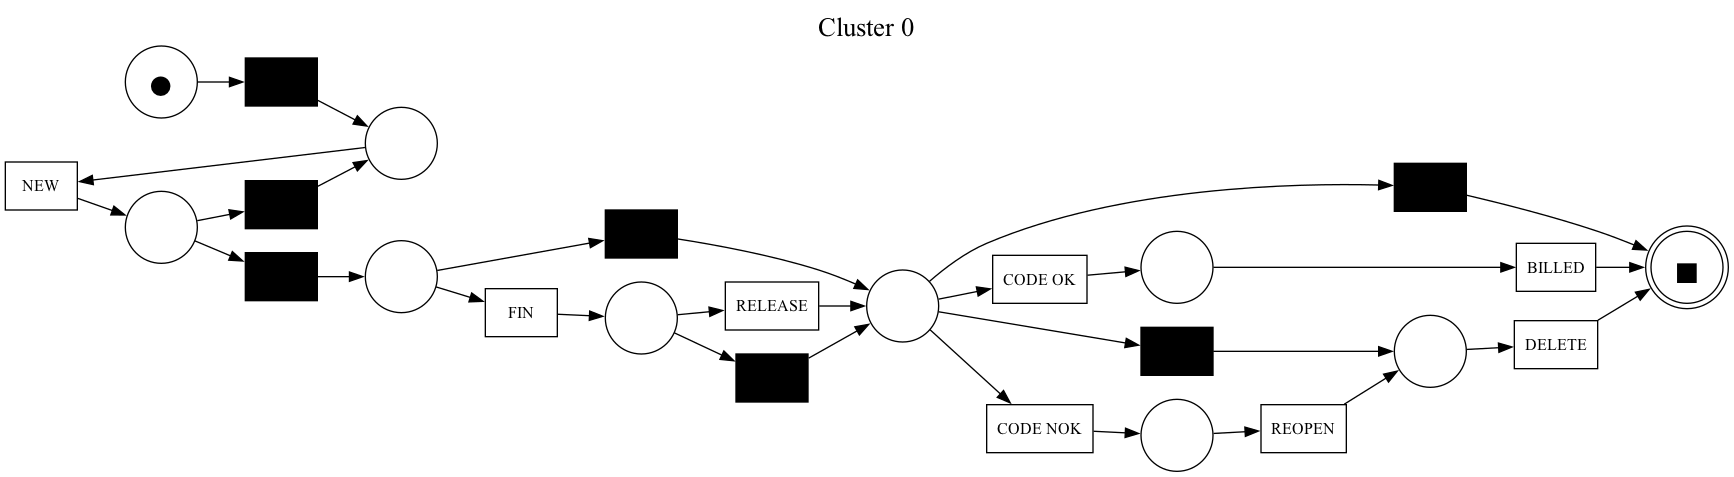

clid 1 group                                                 Traces  Count  Cluster
805  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        1
669  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        1


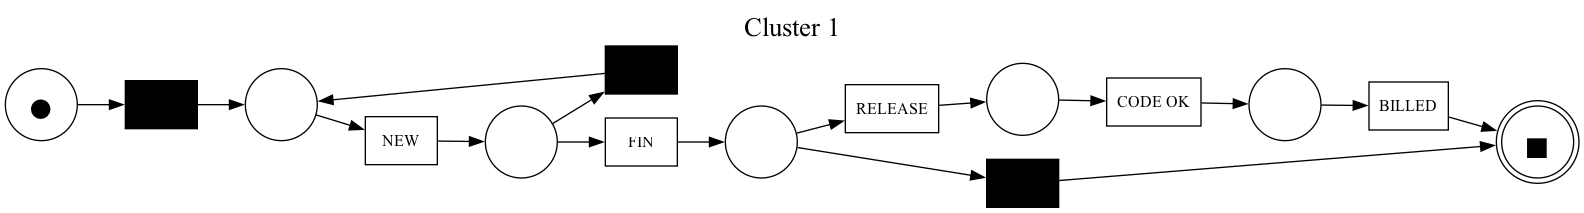

clid 2 group                                                 Traces  Count  Cluster
461  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1        2
546  (NEW, FIN, RELEASE, CODE NOK, CODE NOK, CODE N...      1        2
960  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE NOK, RE...      1        2
963  (NEW, FIN, RELEASE, CODE NOK, REOPEN, FIN, REL...      1        2
719  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1        2
971  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      1        2
420  (NEW, FIN, RELEASE, CODE NOK, REOPEN, FIN, REL...      1        2
827  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE NOK, CO...      1        2
617  (NEW, CHANGE DIAGN, FIN, RELEASE, REOPEN, FIN,...      1        2
888  (NEW, FIN, RELEASE, CODE NOK, CODE NOK, REOPEN...      1        2
840  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1        2
536  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE NOK, RE...      1        2
562  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1   

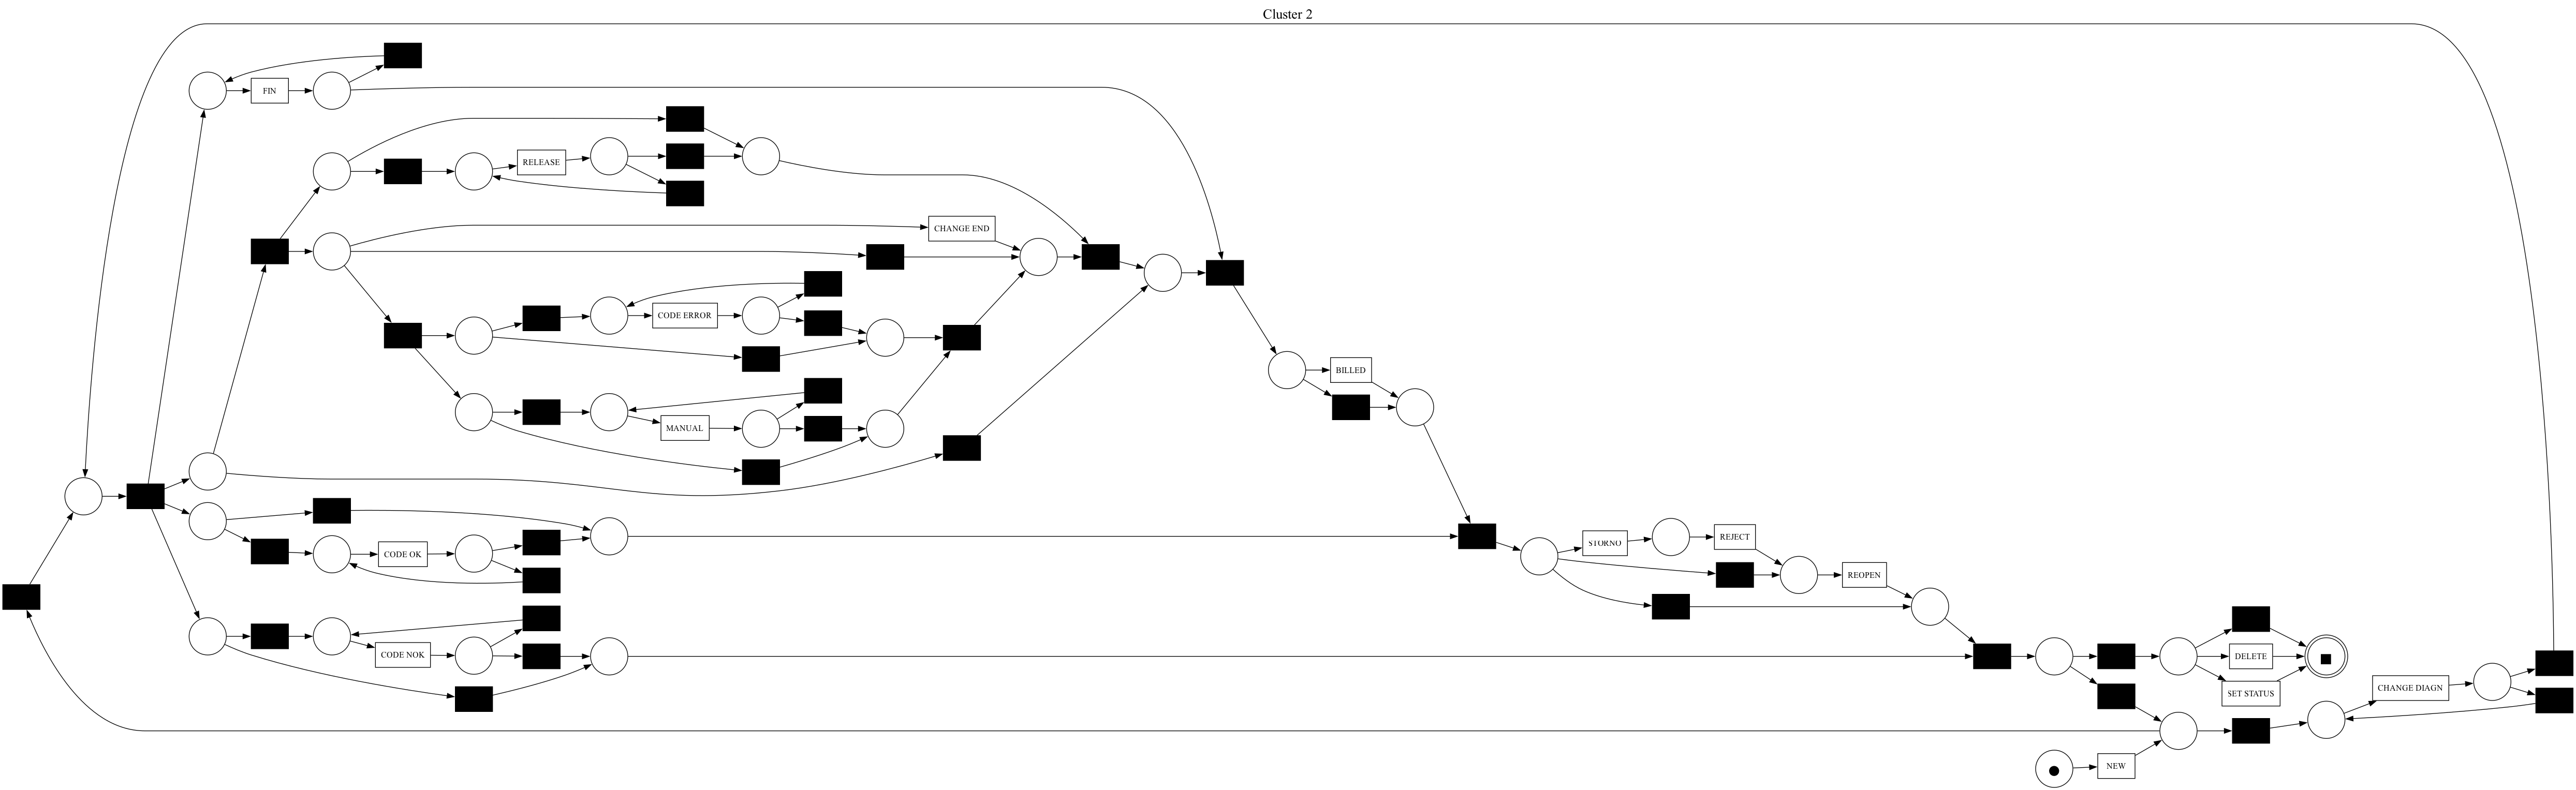

clid 3 group                                                 Traces  Count  Cluster
347  (NEW, FIN, RELEASE, CODE OK, CODE OK, REOPEN, ...      2        3
781  (NEW, FIN, RELEASE, CODE OK, MANUAL, RELEASE, ...      1        3
903  (NEW, FIN, CODE OK, RELEASE, CODE OK, MANUAL, ...      1        3
902  (NEW, FIN, RELEASE, CODE OK, BILLED, STORNO, R...      1        3
782  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, MAN...      1        3
..                                                 ...    ...      ...
98   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, REO...     13        3
838  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, REO...      1        3
705  (NEW, CHANGE DIAGN, FIN, CODE OK, RELEASE, COD...      1        3
364  (NEW, FIN, RELEASE, CODE OK, BILLED, STORNO, R...      2        3
920  (NEW, FIN, RELEASE, CODE OK, BILLED, CODE OK, ...      1        3

[180 rows x 3 columns]


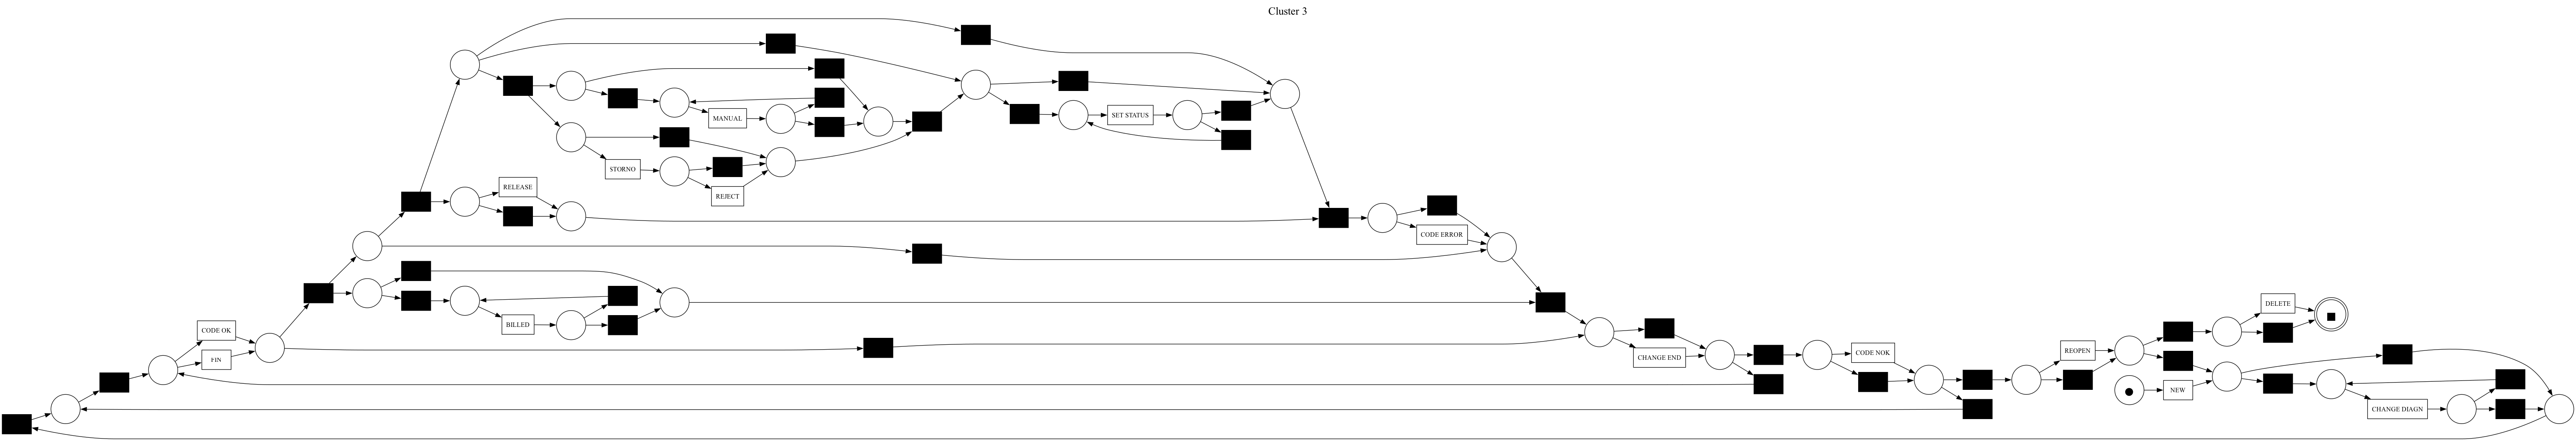

clid 4 group                                                 Traces  Count  Cluster
587  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        4
834  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        4
455  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        4
836  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        4


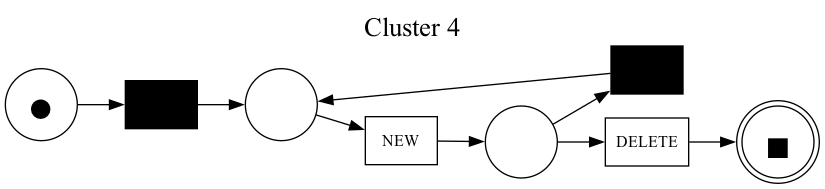

clid 5 group                                                 Traces  Count  Cluster
610  (NEW, FIN, RELEASE, CODE NOK, CODE NOK, CODE N...      1        5
615  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE NOK, CO...      1        5
807  (NEW, FIN, RELEASE, CODE NOK, BILLED, STORNO, ...      1        5
612  (NEW, FIN, RELEASE, CODE NOK, FIN, RELEASE, CO...      1        5
871  (NEW, FIN, RELEASE, CODE ERROR, MANUAL, RELEAS...      1        5
..                                                 ...    ...      ...
185  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      4        5
184  (NEW, FIN, RELEASE, CODE NOK, CODE NOK, CODE O...      4        5
402  (NEW, CHANGE DIAGN, FIN, RELEASE, REOPEN, FIN,...      1        5
895  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1        5
430  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1        5

[103 rows x 3 columns]


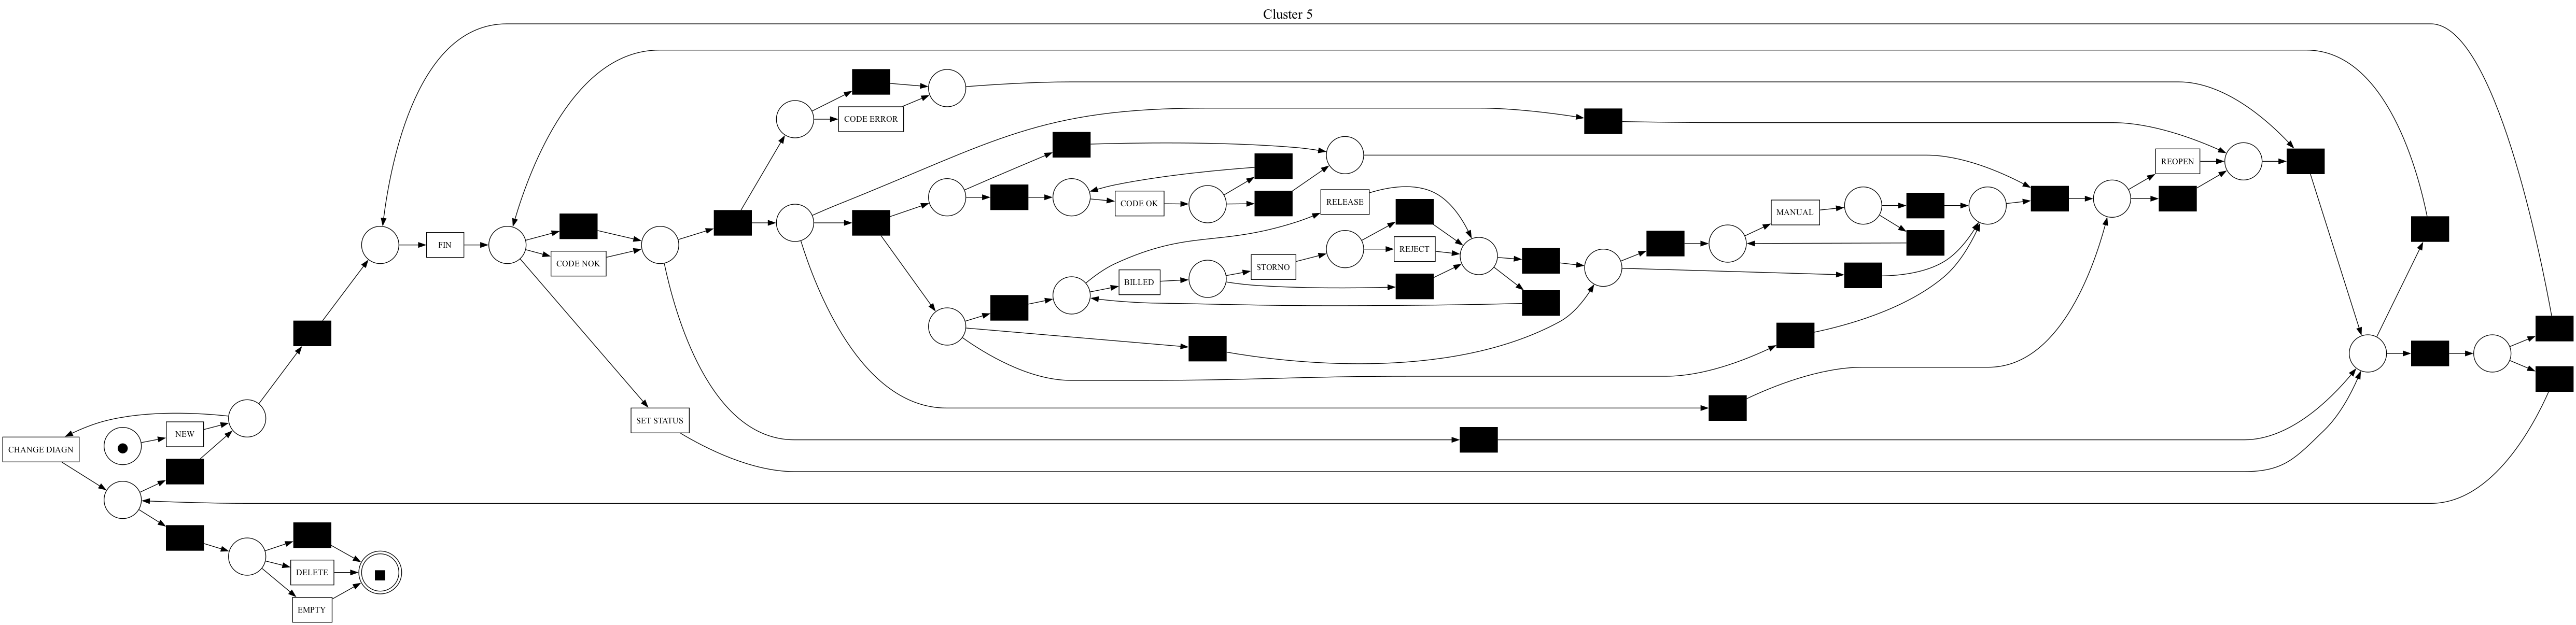

clid 6 group                                                 Traces  Count  Cluster
566  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6
521  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6
358  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      2        6
404  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6
522  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      1        6
..                                                 ...    ...      ...
930  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6
698  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6
282  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      2        6
287  (NEW, FIN, RELEASE, CODE OK, BILLED, STORNO, B...      2        6
953  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1        6

[96 rows x 3 columns]


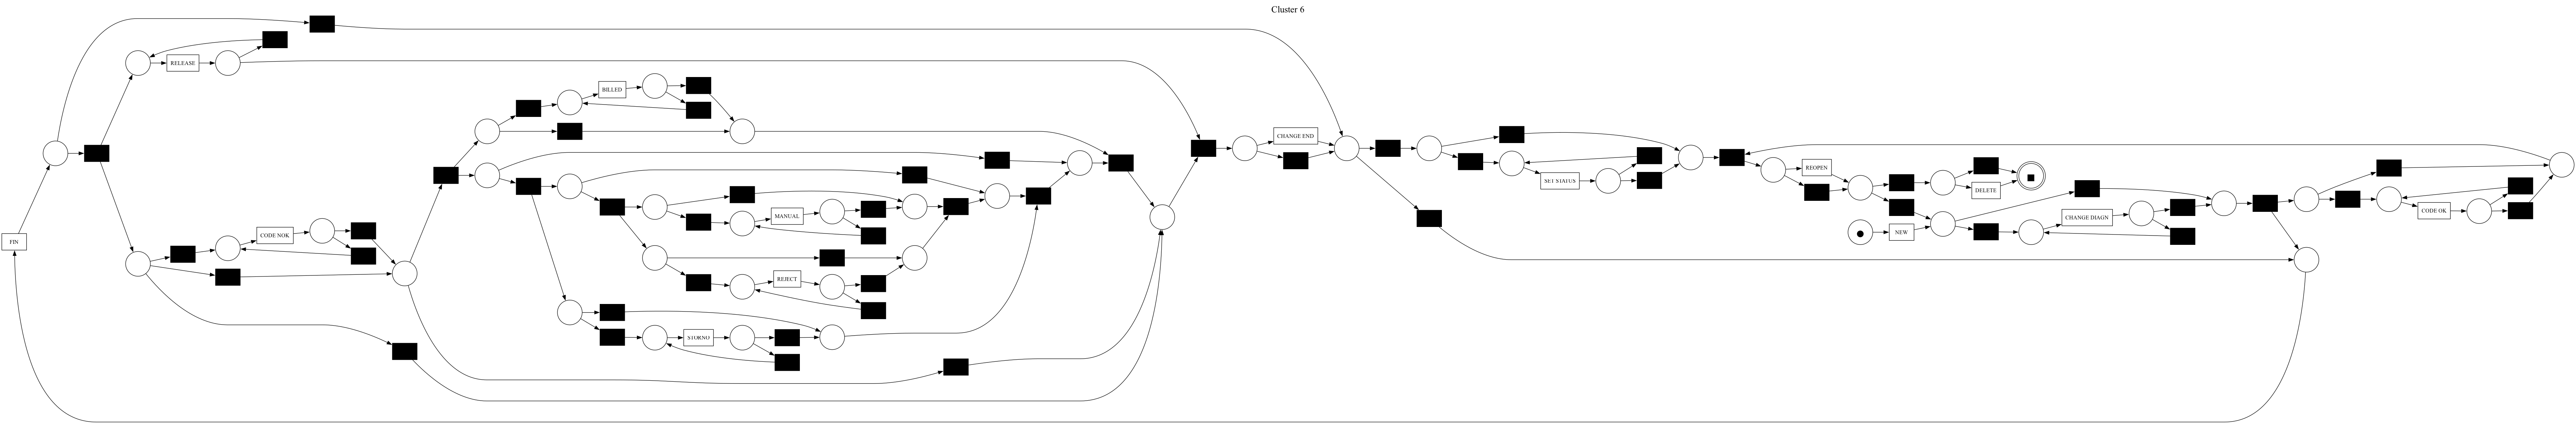

clid 7 group                                                 Traces  Count  Cluster
788  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        7


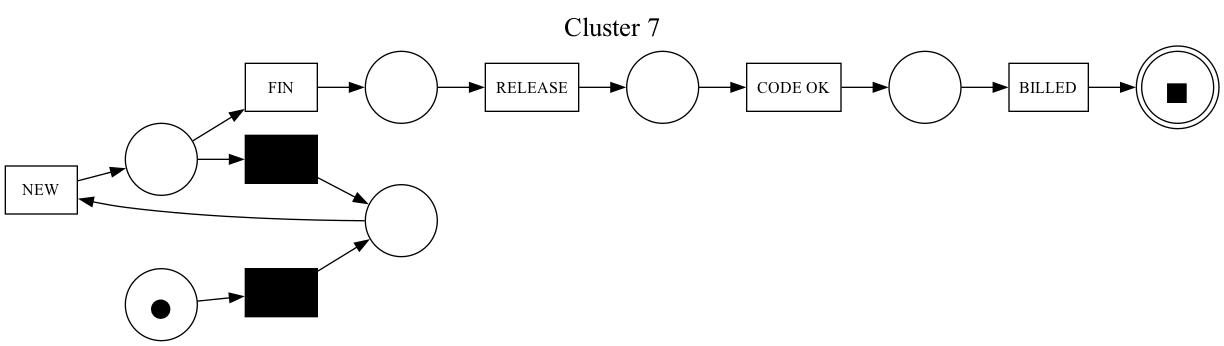

clid 8 group                                                 Traces  Count  Cluster
658  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE NOK, RE...      1        8
654  (NEW, CHANGE DIAGN, FIN, REOPEN, FIN, RELEASE,...      1        8
575  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, REO...      1        8
653  (NEW, FIN, RELEASE, REOPEN, FIN, REOPEN, FIN, ...      1        8
939  (NEW, FIN, RELEASE, REOPEN, FIN, RELEASE, REOP...      1        8
..                                                 ...    ...      ...
734  (NEW, FIN, RELEASE, CODE OK, REOPEN, FIN, REOP...      1        8
195  (NEW, FIN, RELEASE, CODE OK, REOPEN, FIN, REOP...      4        8
890  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, REOPEN,...      1        8
899  (NEW, CHANGE DIAGN, FIN, RELEASE, REOPEN, CHAN...      1        8
421  (NEW, FIN, RELEASE, REOPEN, FIN, REOPEN, FIN, ...      1        8

[99 rows x 3 columns]


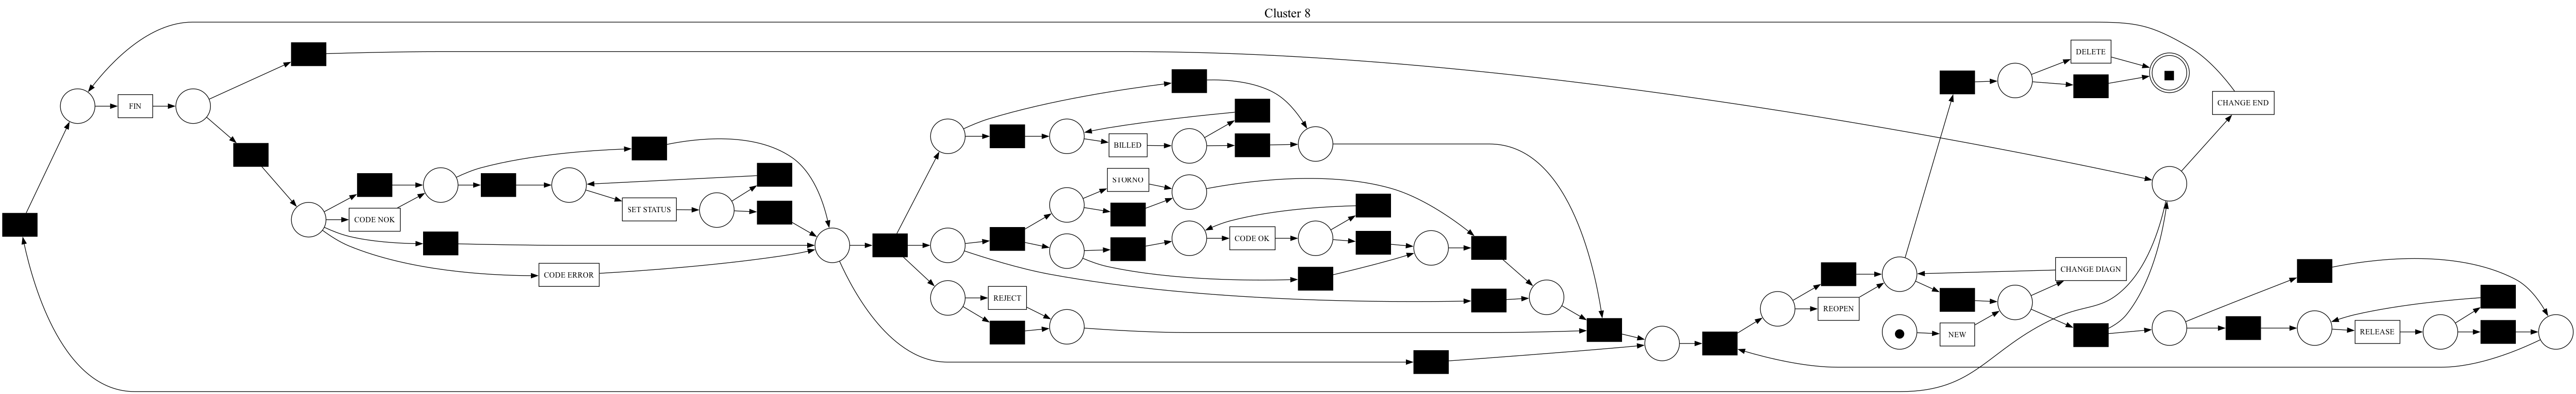

clid 9 group                                                 Traces  Count  Cluster
869  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
693  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
665  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
873  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
837  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
957  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
724  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
786  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
893  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9
712  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1        9


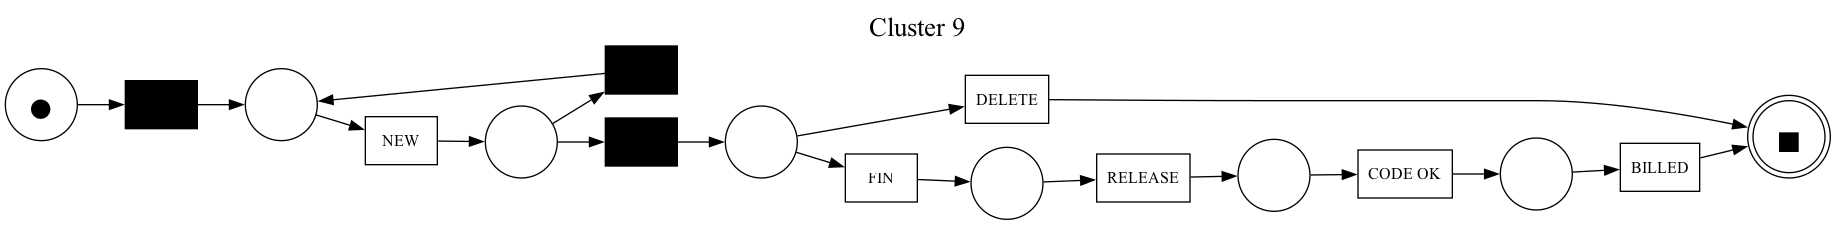

clid 10 group                                                  Traces  Count  Cluster
561   (NEW, FIN, RELEASE, REOPEN, FIN, RELEASE, CODE...      1       10
828   (NEW, FIN, RELEASE, REOPEN, FIN, RELEASE, CODE...      1       10
570   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1       10
694   (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      1       10
686   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1       10
...                                                 ...    ...      ...
425   (NEW, FIN, RELEASE, CODE ERROR, REOPEN, FIN, R...      1       10
1013  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      1       10
760   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, REL...      1       10
415   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, REO...      1       10
492   (NEW, FIN, REOPEN, FIN, CODE OK, RELEASE, CODE...      1       10

[104 rows x 3 columns]


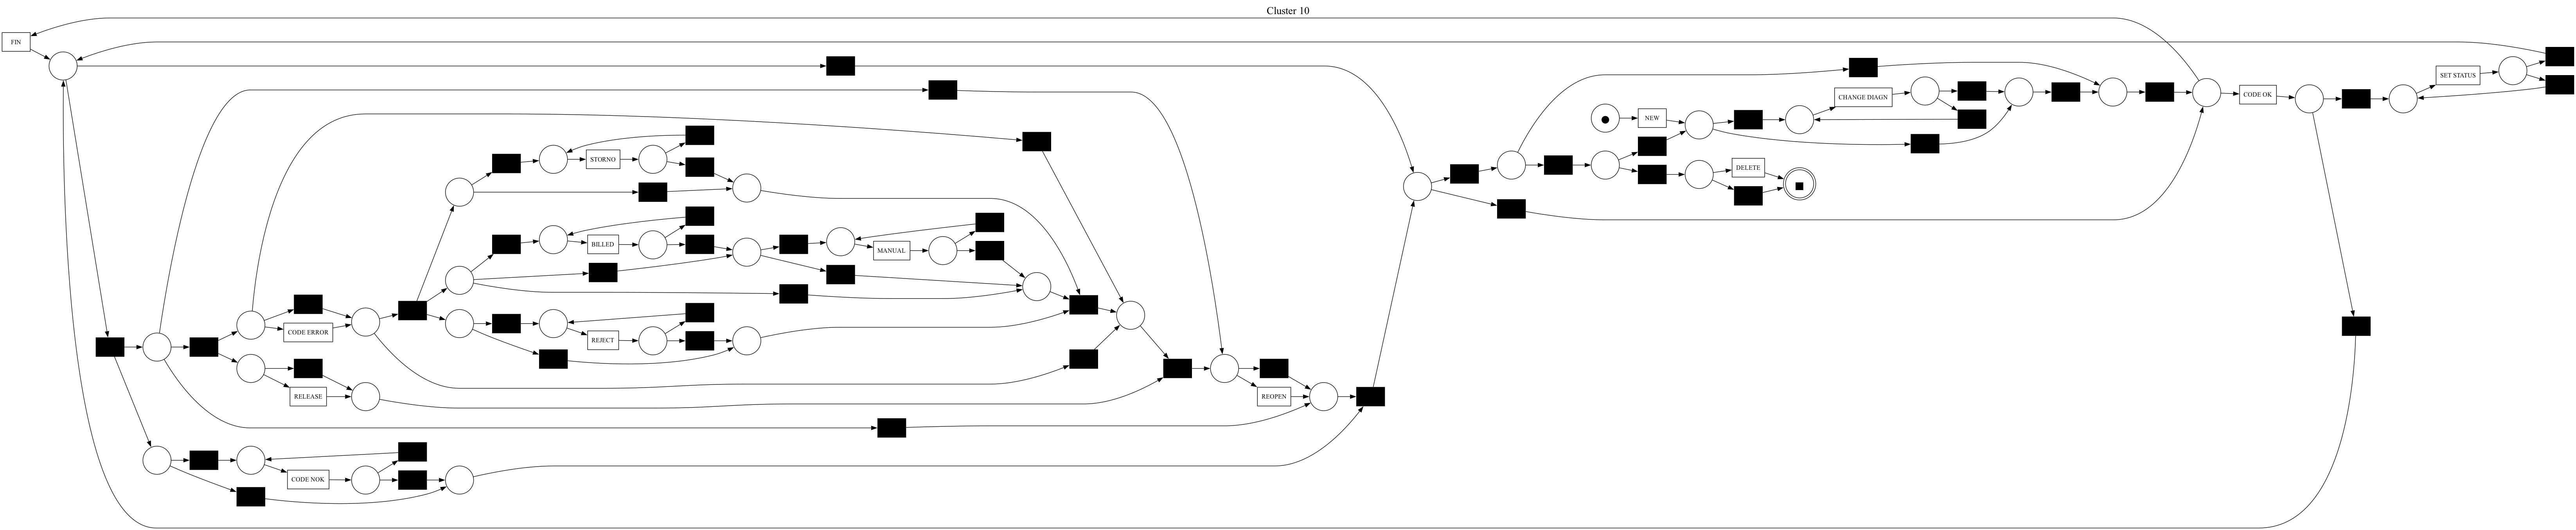

clid 11 group                                                 Traces  Count  Cluster
934  (NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, NEW, ...      1       11


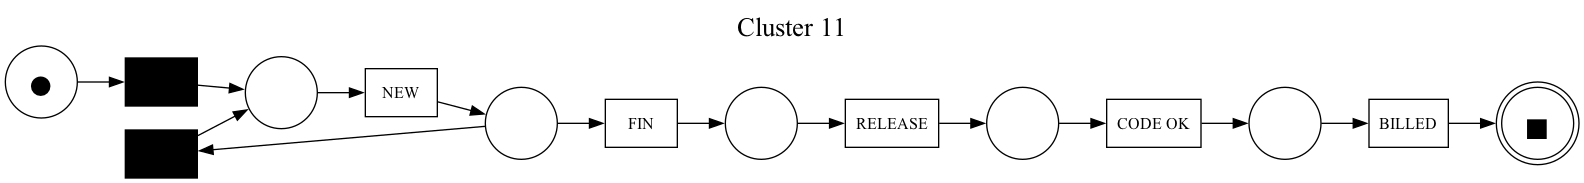

clid 12 group                                                  Traces  Count  Cluster
1011          (NEW, FIN, RELEASE, FIN, RELEASE, DELETE)      1       12
940   (NEW, FIN, RELEASE, BILLED, MANUAL, MANUAL, MA...      1       12
992       (NEW, FIN, RELEASE, MANUAL, CODE NOK, BILLED)      1       12
946   (NEW, FIN, RELEASE, REOPEN, FIN, RELEASE, EMPT...      1       12
987        (NEW, FIN, REOPEN, FIN, REOPEN, FIN, DELETE)      1       12
...                                                 ...    ...      ...
23    (NEW, FIN, RELEASE, CODE OK, BILLED, STORNO, R...    165       12
441   (NEW, CHANGE DIAGN, FIN, RELEASE, CODE ERROR, ...      1       12
439     (NEW, FIN, RELEASE, MANUAL, SET STATUS, DELETE)      1       12
446   (NEW, MANUAL, FIN, RELEASE, MANUAL, FIN, RELEA...      1       12
15    (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...    256       12

[259 rows x 3 columns]


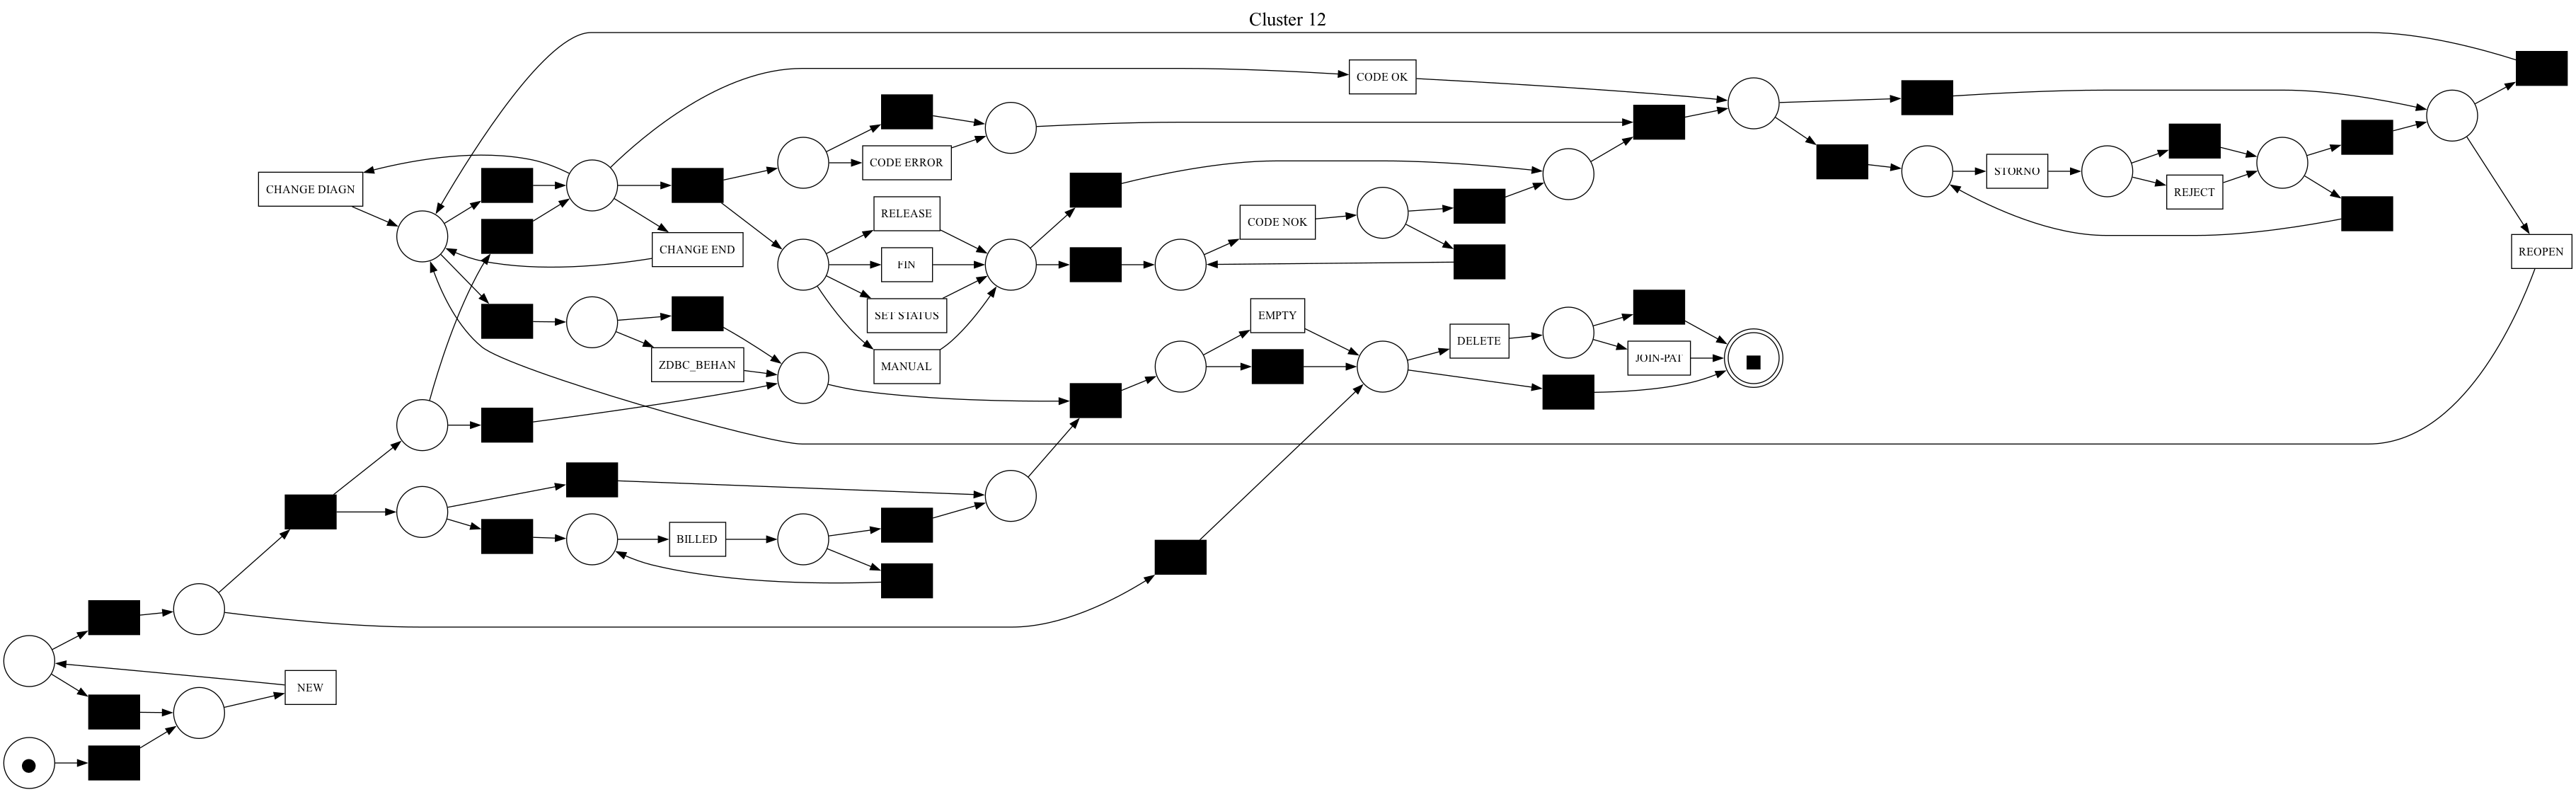

clid 13 group                                                  Traces  Count  Cluster
81    (NEW, NEW, CHANGE DIAGN, JOIN-PAT, JOIN-PAT, J...     17       13
600   (NEW, NEW, CHANGE DIAGN, FIN, FIN, RELEASE, RE...      1       13
707   (NEW, NEW, CHANGE DIAGN, FIN, FIN, RELEASE, RE...      1       13
119   (NEW, NEW, CHANGE DIAGN, FIN, FIN, RELEASE, RE...      8       13
659   (NEW, NEW, CHANGE DIAGN, CHANGE DIAGN, JOIN-PA...      1       13
988            (NEW, NEW, JOIN-PAT, JOIN-PAT, JOIN-PAT)      1       13
896   (NEW, NEW, CHANGE DIAGN, JOIN-PAT, JOIN-PAT, J...      1       13
422   (NEW, NEW, CHANGE DIAGN, FIN, FIN, RELEASE, RE...      1       13
346   (NEW, NEW, CHANGE DIAGN, FIN, FIN, RELEASE, RE...      2       13
438   (NEW, NEW, FIN, FIN, RELEASE, RELEASE, CODE NO...      1       13
320   (NEW, NEW, CHANGE DIAGN, JOIN-PAT, JOIN-PAT, J...      2       13
475   (NEW, NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, FI...      1       13
291   (NEW, NEW, FIN, FIN, RELEASE, RELEASE, CODE 

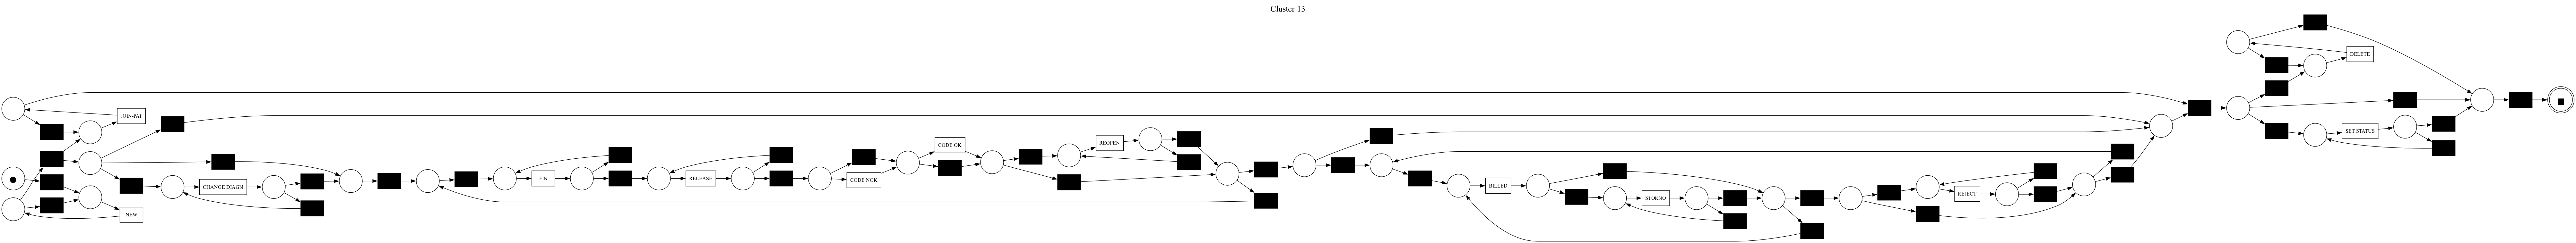

clid 14 group                                                 Traces  Count  Cluster
5    (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...   2121       14
983  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      1       14
945  (NEW, CHANGE DIAGN, CHANGE DIAGN, CHANGE DIAGN...      1       14
43   (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...     64       14
944  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, REOPEN,...      1       14
..                                                 ...    ...      ...
263  (NEW, CHANGE DIAGN, FIN, RELEASE, CODE OK, BIL...      2       14
207  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      3       14
180  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      4       14
306  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, RELEASE...      2       14
510  (NEW, CHANGE DIAGN, CHANGE DIAGN, FIN, REOPEN,...      1       14

[97 rows x 3 columns]


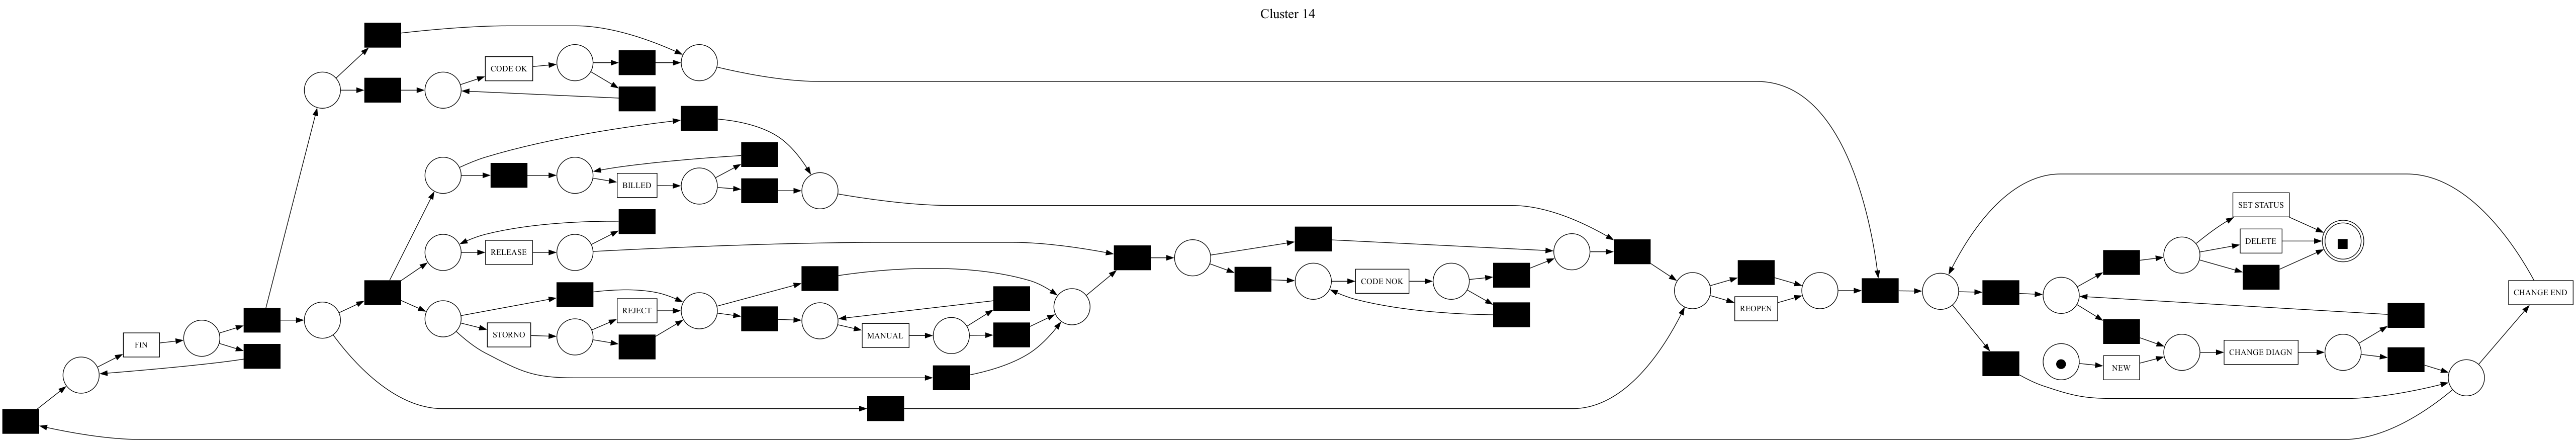

In [17]:
import pm4py
import pandas as pd
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.visualization.petri_net import visualizer as pm4pyvis

def create_event_log(traces):
    log = EventLog()
    for trace_tuple in traces:
        trace = Trace()
        for event_name in trace_tuple:
            event = Event({"concept:name": event_name})
            trace.append(event)
        log.append(trace)
    return log


clusters = df_sorted.groupby('Cluster')

for cluster_id, content in clusters:
    traces = content['Traces'].repeat(content['Count']).tolist()
    event_log = create_event_log(traces)
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
    gviz = pm4pyvis.apply(net, initial_marking, final_marking)
    gviz.graph_attr['label'] = f'Cluster {cluster_id}'
    gviz.graph_attr['labelloc'] = 't'
    gviz.graph_attr['fontsize'] = '20'
    pm4pyvis.view(gviz)